In [3]:
import pandas as pd
import holidays

# Sample data with a 'date' column
data = {'date': pd.date_range(start='2024-01-01', end='2024-01-10')}
df = pd.DataFrame(data)

# Convert 'date' column to datetime format (if not already)
df['date'] = pd.to_datetime(df['date'])

# Set up holiday dates for France
french_holidays = holidays.France()

# Create a holiday column, marking True if the date is a holiday, False otherwise
df['is_holiday'] = df['date'].apply(lambda x: x in french_holidays)

# Display the resulting dataframe
print(df)

        date  is_holiday
0 2024-01-01        True
1 2024-01-02       False
2 2024-01-03       False
3 2024-01-04       False
4 2024-01-05       False
5 2024-01-06       False
6 2024-01-07       False
7 2024-01-08       False
8 2024-01-09       False
9 2024-01-10       False


In [4]:
# Load the data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Ensure the date column is in datetime format
train_df['date'] = pd.to_datetime(train_df['id'])
test_df['date'] = pd.to_datetime(test_df['id'])

# Set up French holidays
french_holidays = holidays.France()

# Define a function to mark holidays
def is_holiday(date):
    return date in french_holidays

# Apply the holiday function to both train and test data
train_df['is_holiday'] = train_df['date'].apply(is_holiday)
test_df['is_holiday'] = test_df['date'].apply(is_holiday)

# Save the modified files (optional)
train_df.to_csv('train_with_holidays.csv', index=False)
test_df.to_csv('test_with_holidays.csv', index=False)

In [6]:
# Overview of data
print(train_df.head())
print(train_df.info())

# Summary statistics
print(train_df.describe())

              id  valeur_NO2  valeur_CO  valeur_O3  valeur_PM10  valeur_PM25  \
0  2020-01-01 00        42.9      0.718       15.7         73.1         64.4   
1  2020-01-01 01        33.6      0.587       10.1         74.8         66.0   
2  2020-01-01 02        29.3        NaN        5.1         51.0         44.9   
3  2020-01-01 03        30.5      0.246        7.2         27.7         25.1   
4  2020-01-01 04        29.3      0.204        8.3         15.3         13.6   

                 date  is_holiday  
0 2020-01-01 00:00:00        True  
1 2020-01-01 01:00:00        True  
2 2020-01-01 02:00:00        True  
3 2020-01-01 03:00:00        True  
4 2020-01-01 04:00:00        True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40991 entries, 0 to 40990
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           40991 non-null  object        
 1   valeur_NO2   37694 non-null  float64       

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

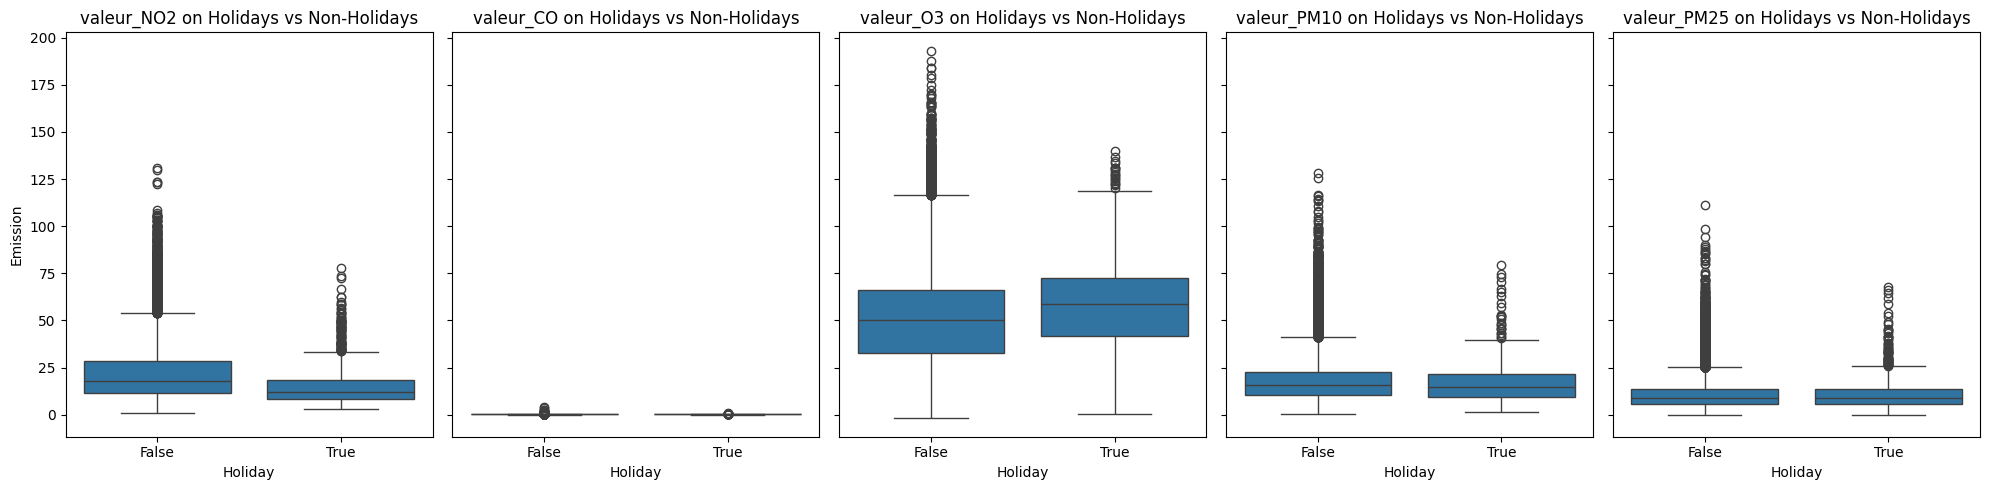

In [17]:
# List of pollutant column names
pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']
        
# Set up a row of subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Loop through each pollutant and create a boxplot
for i, pollutant in enumerate(pollutants):
    sns.boxplot(x='is_holiday', y=pollutant, data=train_df, ax=axes[i])
    axes[i].set_title(f'{pollutant} on Holidays vs Non-Holidays')
    axes[i].set_xlabel('Holiday')
    axes[i].set_ylabel('Emission')

plt.tight_layout()
plt.show()

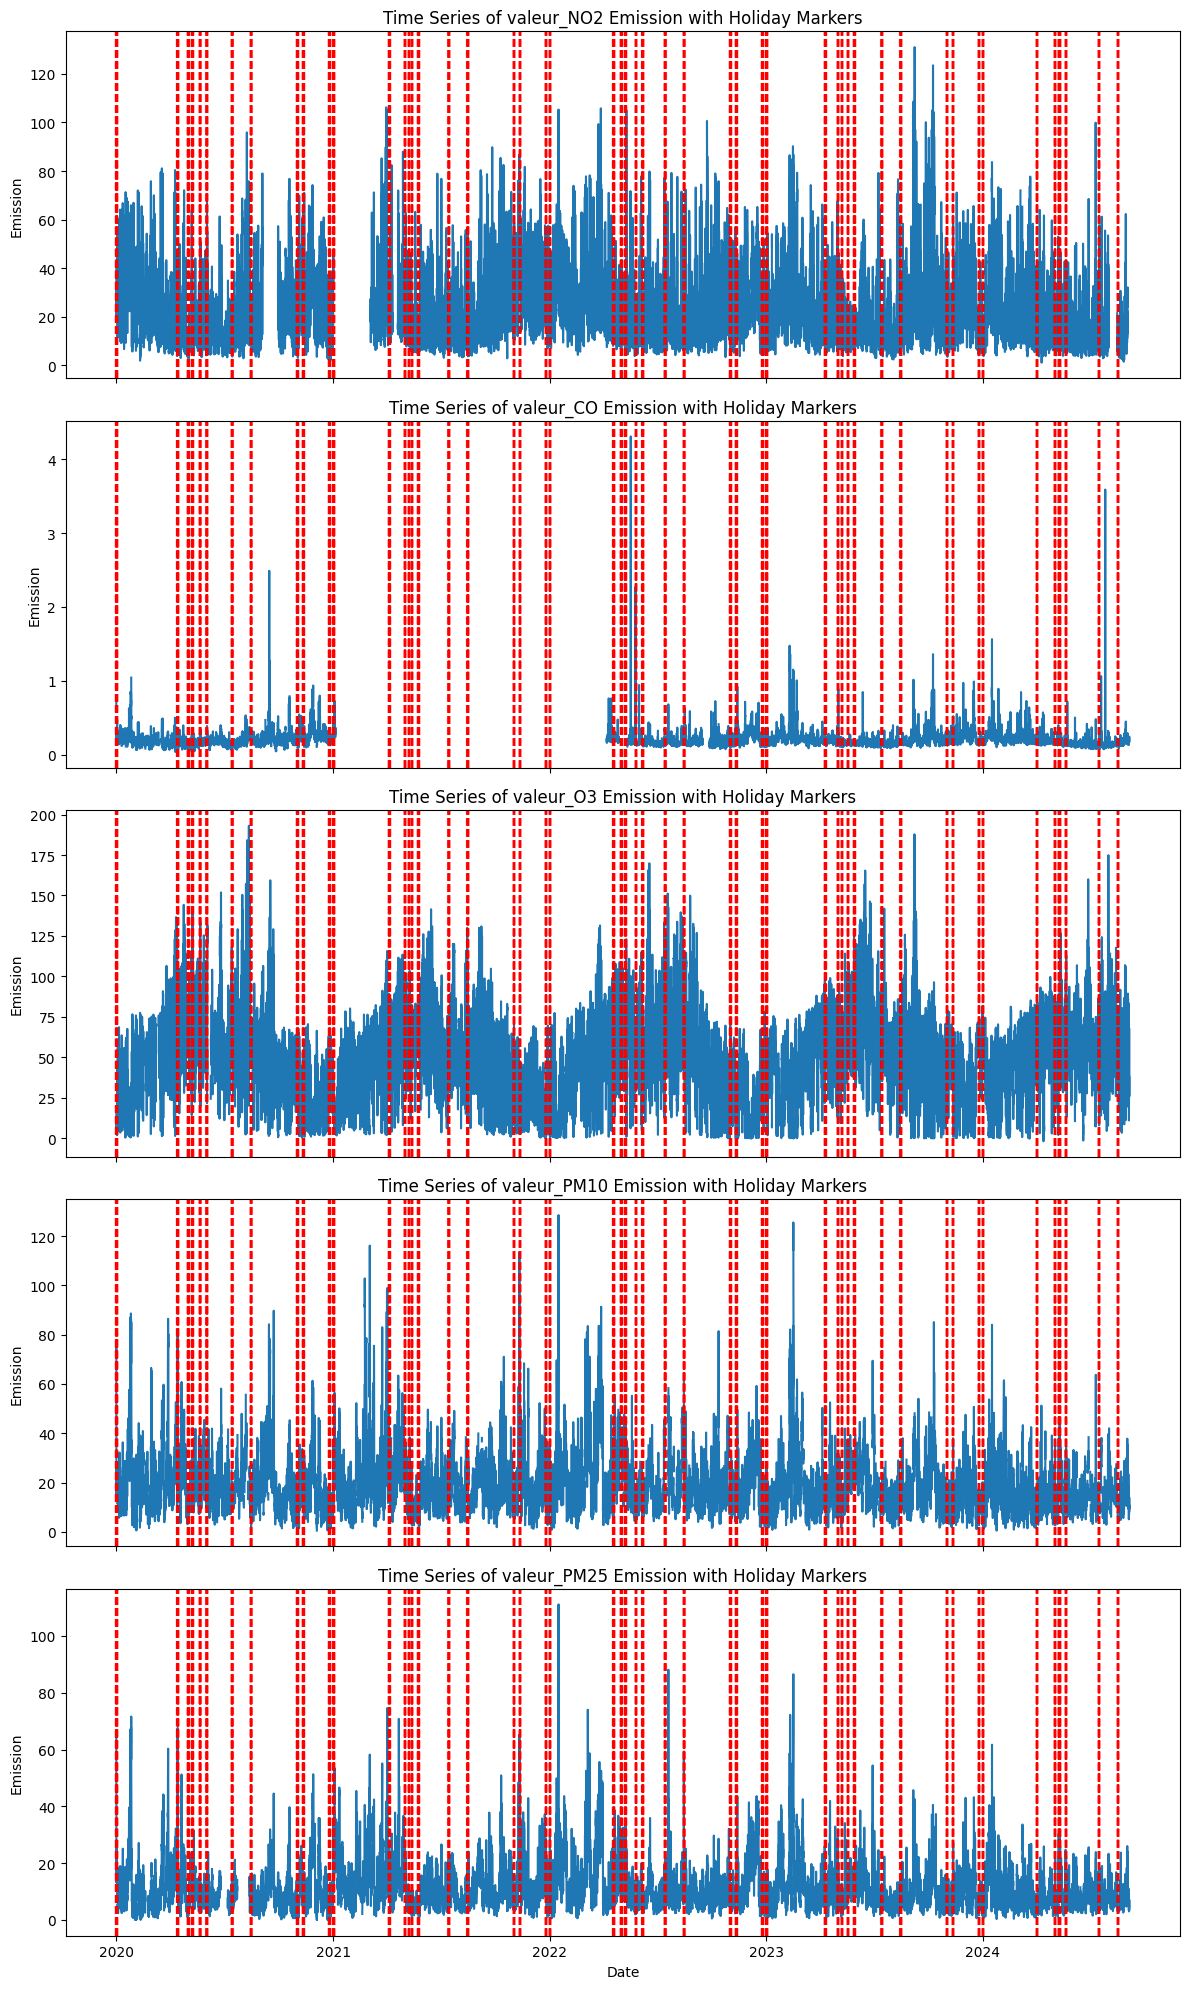

In [25]:
pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

# 设置子图：每个污染物一个图
fig, axes = plt.subplots(5, 1, figsize=(12, 20), sharex=True)

for i, pollutant in enumerate(pollutants):
    # 绘制污染物的时间序列
    axes[i].plot(train_df['date'], train_df[pollutant], label=f'{pollutant} Emission')
    
    # 标记节假日
    holiday_dates = train_df[train_df['is_holiday']]['date']
    for holiday in holiday_dates:
        # 在时间轴上方添加垂直线
        axes[i].axvline(holiday, color='red', linestyle='--', alpha=0.5)
    # 设置标题和标签
    axes[i].set_title(f'Time Series of {pollutant} Emission with Holiday Markers')
    axes[i].set_ylabel('Emission')

# 设置公共 x 轴标签
axes[-1].set_xlabel('Date')

# 调整布局避免重叠
plt.tight_layout()
plt.show()